<div class="usecase-title">Leveraging Property Ownership Data for Smart Urban Planning and Development</div>

<div class="usecase-authors"><b>Authored by: Mahesh chirra</b> </div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<header>
<h2>Introduction</h2>
<div>The City of Melbourne’s Urban Planning Department is facing rapid population growth and increased pressure on infrastructure. To manage this growth sustainably, the city initiates a data-driven project using property ownership records, residential dwelling data, and business establishment datasets.</div>
<header>
<h2>Scenario</h2>       
<div>I want to analyse land ownership, residential density, and business activity across Melbourne,so that I can uncover patterns in land use and identify opportunities for balanced urban growth.
Property ownership data provides crucial insights into how land is currently utilized and where it may be underutilized. This analysis helps detect high-density zones that need infrastructure upgrades and low-activity areas suitable for redevelopment. The outcome will support strategic planning that aligns with sustainable development goals and improves overall city livability.I want to evaluate land utilization trends using integrated datasets,so that I can guide zoning policy and investment strategies for future growth.
By combining property boundaries with residential and commercial data, this analysis helps pinpoint areas with high development potential or imbalanced land use. It enables evidence-based decisions that promote efficient land distribution, inform real estate investments, and foster community well-being through more equitable urban development.</div>
<header>   
<h2>DATASETS :</h2>
<div>DATASET 1:https://data.melbourne.vic.gov.au/explore/dataset/property-boundaries/information/</div>
    <div>TITLE:Property Boundaries Dataset</div>
<div>The Property Boundaries Dataset defines land ownership, parcel boundaries, and zoning regulations across Melbourne. This comprehensive spatial information helps planners optimize land use, infrastructure development, and identify redevelopment opportunities in various neighborhoods.</div>
    
<div>DATASET 2:https://data.melbourne.vic.gov.au/explore/dataset/residential-dwellings/information/</div>
    <div>TITLE:Residential Dwellings Datase</div>
<div>The Residential Dwellings Dataset contains detailed information on housing density, dwelling types, and spatial distribution throughout Melbourne's metropolitan area. This valuable resource guides urban expansion initiatives, infrastructure planning decisions, and the development of affordable housing policies that address community needs.</div>
    
<div>DATASET 3:https://data.melbourne.vic.gov.au/explore/dataset/business-establishments-with-address-and-industry-classification/information/</div>
    <div>TITLE:Business Establishments Dataset</div>
<div>The Business Establishments Dataset maps commercial properties, industry classifications, and business locations across Melbourne's diverse neighborhoods. This rich dataset supports economic development planning, informs zoning regulation decisions, and highlights potential investment opportunities for developers and entrepreneurs.</div>


# importing required libraries

In [60]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd

# datsets through api

In [4]:
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    dataset_id  = dataset_id
    format='csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit' : -1,
        'lang' : 'en',
        'timezone' : 'UTC'
    }

    response = requests.get(url,params=params)

    if response.status_code ==200:
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f"Request failed with status code: {response.status_code}")
# population_smallarea dataset
dataset_id_1 = 'property-boundaries'
dataset_id_2 = 'residential-dwellings'
dataset_id_3 = 'business-establishments-with-address-and-industry-classification'

property_boundaries= collect_data(dataset_id_1)
residential_dwellings = collect_data(dataset_id_2)
business_establishments = collect_data(dataset_id_3)

print(len(property_boundaries))
print(len(residential_dwellings))
print(len(business_establishments))

15171
209162
393878


# DATA CLEANING
*DATASET 1:In the Property Boundaries dataset, the initial data cleaning involved standardizing column names by removing unnecessary whitespace and converting them to lowercase to ensure consistency during analysis. The geo_point_2d field, which contained location coordinates as a single string, was split into separate latitude and longitude columns to facilitate spatial analysis and mapping.

In [61]:
property_boundaries.head()

,json_geometry,polyarea,address,gis_id,property_id,property_name,date_updated,polygon,geo_point_2d,Latitude,Longitude,land_use_type,has_business
0,"{""coordinates"": [[[144.9654806918, -37.7939203...",748,950 Swanston Street CARLTON VIC 3053,15046,668400,Unknown,2025-04-16,POLYGON ((144.96548069179414 -37.7939203410939...,"-37.79378326273329, 144.9654100724946",-37.793783,144.965410,Residential,0
1,"{""coordinates"": [[[144.965672938, -37.79396951...",356,110 Keppel Street CARLTON VIC 3053,15048,668402,Unknown,2025-04-16,"POLYGON ((144.9656729379567 -37.793969513128,1...","-37.79403603211612, 144.96567644611073",-37.794036,144.965676,Residential,0
2,"{""coordinates"": [[[144.9547341166, -37.7969299...",890,Elizabeth Blackburn School of Sciences (Univer...,15054,674741,Elizabeth Blackburn School of Sciences (Univer...,2025-04-16,POLYGON ((144.95473411661365 -37.7969299216637...,"-37.796995854633224, 144.95448493076697",-37.796996,144.954485,Commercial,1
3,"{""coordinates"": [[[144.955085577, -37.80307222...",471,1 Courtney Street NORTH MELBOURNE VIC 3051,15055,676734,Unknown,2025-04-16,POLYGON ((144.95508557704284 -37.8030722256791...,"-37.803183099609214, 144.95512112687854",-37.803183,144.955121,Residential,0
4,"{""coordinates"": [[[144.9549544562, -37.8029679...",773,5 Courtney Street NORTH MELBOURNE VIC 3051,15056,676735,Unknown,2025-04-16,POLYGON ((144.95495445620602 -37.8029679724693...,"-37.803069561900216, 144.95481375796527",-37.803070,144.954814,Residential,0


In [62]:
property_boundaries.columns = property_boundaries.columns.str.strip().str.lower()

In [63]:
property_boundaries[['Latitude', 'Longitude']] = property_boundaries['geo_point_2d'].str.split(',', expand=True).astype(float)

In [64]:
property_boundaries['date_updated'] = pd.to_datetime(property_boundaries['date_updated'], format='%Y%m%d')

In [65]:
property_boundaries.isnull().sum()

json_geometry    0
polyarea         0
address          0
gis_id           0
property_id      0
property_name    0
date_updated     0
polygon          0
geo_point_2d     0
latitude         0
longitude        0
land_use_type    0
has_business     0
Latitude         0
Longitude        0
dtype: int64

In [66]:
property_boundaries['property_name'] = property_boundaries['property_name'].fillna('Unknown')

In [67]:
property_boundaries.isnull().sum()

json_geometry    0
polyarea         0
address          0
gis_id           0
property_id      0
property_name    0
date_updated     0
polygon          0
geo_point_2d     0
latitude         0
longitude        0
land_use_type    0
has_business     0
Latitude         0
Longitude        0
dtype: int64

In [68]:
print(len(property_boundaries))

15171


In [69]:
property_boundaries.head()

,json_geometry,polyarea,address,gis_id,property_id,property_name,date_updated,polygon,geo_point_2d,latitude,longitude,land_use_type,has_business,Latitude,Longitude
0,"{""coordinates"": [[[144.9654806918, -37.7939203...",748,950 Swanston Street CARLTON VIC 3053,15046,668400,Unknown,2025-04-16,POLYGON ((144.96548069179414 -37.7939203410939...,"-37.79378326273329, 144.9654100724946",-37.793783,144.965410,Residential,0,-37.793783,144.965410
1,"{""coordinates"": [[[144.965672938, -37.79396951...",356,110 Keppel Street CARLTON VIC 3053,15048,668402,Unknown,2025-04-16,"POLYGON ((144.9656729379567 -37.793969513128,1...","-37.79403603211612, 144.96567644611073",-37.794036,144.965676,Residential,0,-37.794036,144.965676
2,"{""coordinates"": [[[144.9547341166, -37.7969299...",890,Elizabeth Blackburn School of Sciences (Univer...,15054,674741,Elizabeth Blackburn School of Sciences (Univer...,2025-04-16,POLYGON ((144.95473411661365 -37.7969299216637...,"-37.796995854633224, 144.95448493076697",-37.796996,144.954485,Commercial,1,-37.796996,144.954485
3,"{""coordinates"": [[[144.955085577, -37.80307222...",471,1 Courtney Street NORTH MELBOURNE VIC 3051,15055,676734,Unknown,2025-04-16,POLYGON ((144.95508557704284 -37.8030722256791...,"-37.803183099609214, 144.95512112687854",-37.803183,144.955121,Residential,0,-37.803183,144.955121
4,"{""coordinates"": [[[144.9549544562, -37.8029679...",773,5 Courtney Street NORTH MELBOURNE VIC 3051,15056,676735,Unknown,2025-04-16,POLYGON ((144.95495445620602 -37.8029679724693...,"-37.803069561900216, 144.95481375796527",-37.803070,144.954814,Residential,0,-37.803070,144.954814


*DATASET 2:In the Residential Dwellings dataset, the data cleaning process involved standardizing column names for consistency and identifying missing values, particularly in the latitude and longitude fields. Rows with missing geographic coordinates were removed to ensure accuracy in location-based analysis.

In [70]:
residential_dwellings.head()

,census_year,block_id,property_id,base_property_id,building_address,clue_small_area,dwelling_type,dwelling_number,longitude,latitude,location
0,2002,13,103954,103954,381-387 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Residential Apartments,2,144.961399,-37.818252,"-37.81825225091258, 144.96139854749805"
1,2002,13,106435,106435,21-31 Market Street MELBOURNE 3000,Melbourne (CBD),Residential Apartments,111,144.960430,-37.818647,"-37.818646932212395, 144.96042989133713"
2,2002,14,103165,103165,1-5 Elizabeth Street MELBOURNE 3000,Melbourne (CBD),Residential Apartments,2,144.964617,-37.818058,"-37.81805796983434, 144.96461741084877"
3,2002,14,103911,103911,5-7 Flinders Court MELBOURNE 3000,Melbourne (CBD),House/Townhouse,1,144.964163,-37.817759,"-37.817759429593565, 144.96416338914727"
4,2002,14,103949,103949,333 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Residential Apartments,2,144.963345,-37.817821,"-37.81782053323523, 144.96334455749917"


In [71]:
residential_dwellings.isnull().sum()

census_year         0
block_id            0
property_id         0
base_property_id    0
building_address    0
clue_small_area     0
dwelling_type       0
dwelling_number     0
longitude           0
latitude            0
location            0
dtype: int64

In [72]:
residential_dwellings = residential_dwellings.dropna(subset=['latitude', 'longitude'])

In [73]:
residential_dwellings['dwelling_type'] = residential_dwellings['dwelling_type'].astype('category')

In [74]:
residential_dwellings.isnull().sum()

census_year         0
block_id            0
property_id         0
base_property_id    0
building_address    0
clue_small_area     0
dwelling_type       0
dwelling_number     0
longitude           0
latitude            0
location            0
dtype: int64

*DATASET 3:In the Business Establishments dataset, cleaning involved standardizing column names and addressing missing values in key fields. Records with missing latitude and longitude were removed to maintain accuracy in geospatial analysis. Additionally, missing trading name values were filled with "Unknown" to preserve those entries for land use classification. These steps ensured the dataset was complete, consistent, and ready for integration with property and residential data.

In [75]:
business_establishments.head()

,census_year,block_id,property_id,base_property_id,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,longitude,latitude,point
0,2008,1007,557160,557160,West Melbourne (Industrial),Australian Bulk Alliance,18 Enterprize Road WEST MELBOURNE 3003,5309,Other Warehousing and Storage Services,144.928829,-37.813597,"-37.8135968481, 144.92882938462844"
1,2008,1007,612871,612871,West Melbourne (Industrial),Port of Melbourne Corporation,Adjacent 499-623 Footscray Road WEST MELBOURNE...,5212,Port and Water Transport Terminal Operations,144.920609,-37.808462,"-37.808461523999995, 144.92060866455546"
2,2008,1007,612881,612881,West Melbourne (Industrial),Port of Melbourne Corporation,74 Appleton Dock Road WEST MELBOURNE 3003,5212,Port and Water Transport Terminal Operations,144.925173,-37.814461,"-37.814461481799995, 144.92517284472797"
3,2008,1007,612882,612882,West Melbourne (Industrial),Vacant,20 Enterprize Road WEST MELBOURNE 3003,0,Vacant Space,144.930528,-37.813192,"-37.81319232635, 144.9305284261212"
4,2008,1009,102954,102954,West Melbourne (Industrial),Victorian Rail Track Corporation,"Rear Level 3, 338-360 Dudley Street WEST MELBO...",4720,Rail Passenger Transport,144.943517,-37.811704,"-37.81170358641947, 144.94351739145"


In [76]:
business_establishments.isnull().sum()

census_year                     0
block_id                        0
property_id                     0
base_property_id                0
clue_small_area                 0
trading_name                    0
business_address                0
industry_anzsic4_code           0
industry_anzsic4_description    0
longitude                       0
latitude                        0
point                           0
dtype: int64

In [77]:
business_establishments = business_establishments.dropna(subset=['latitude', 'longitude'])

In [78]:
business_establishments['trading_name'] = business_establishments['trading_name'].fillna('Unknown')

In [79]:
business_establishments = business_establishments.dropna(subset=['business_address'])

In [80]:
business_establishments.isnull().sum()


census_year                     0
block_id                        0
property_id                     0
base_property_id                0
clue_small_area                 0
trading_name                    0
business_address                0
industry_anzsic4_code           0
industry_anzsic4_description    0
longitude                       0
latitude                        0
point                           0
dtype: int64

Distinguishing between residential, commercial, and mixed-use properties is a critical step in this use case, as it allows urban planners, developers, and policymakers to understand how land is currently utilized across Melbourne. By classifying properties based on their usage, we can identify areas that are densely populated, commercially active, or serve dual purposes—insights that are essential for informed decision-making. This classification helps highlight imbalances or opportunities in land use, supports zoning decisions, and guides investment strategies aimed at promoting sustainable urban growth, enhancing infrastructure planning, and improving community well-being.

In [81]:
residential_ids = set(residential_dwellings['property_id'].unique())
business_ids = set(business_establishments['property_id'].unique())

In [82]:
def classify_land_use(property_id):
    in_residential = property_id in residential_ids
    in_business = property_id in business_ids
    if in_residential and in_business:
        return "Mixed-Use"
    elif in_residential:
        return "Residential"
    elif in_business:
        return "Commercial"
    else:
        return "Unclassified"

In [83]:
property_boundaries['land_use_type'] = property_boundaries['property_id'].apply(classify_land_use)

In [84]:
property_boundaries.head()

,json_geometry,polyarea,address,gis_id,property_id,property_name,date_updated,polygon,geo_point_2d,latitude,longitude,land_use_type,has_business,Latitude,Longitude
0,"{""coordinates"": [[[144.9654806918, -37.7939203...",748,950 Swanston Street CARLTON VIC 3053,15046,668400,Unknown,2025-04-16,POLYGON ((144.96548069179414 -37.7939203410939...,"-37.79378326273329, 144.9654100724946",-37.793783,144.965410,Residential,0,-37.793783,144.965410
1,"{""coordinates"": [[[144.965672938, -37.79396951...",356,110 Keppel Street CARLTON VIC 3053,15048,668402,Unknown,2025-04-16,"POLYGON ((144.9656729379567 -37.793969513128,1...","-37.79403603211612, 144.96567644611073",-37.794036,144.965676,Residential,0,-37.794036,144.965676
2,"{""coordinates"": [[[144.9547341166, -37.7969299...",890,Elizabeth Blackburn School of Sciences (Univer...,15054,674741,Elizabeth Blackburn School of Sciences (Univer...,2025-04-16,POLYGON ((144.95473411661365 -37.7969299216637...,"-37.796995854633224, 144.95448493076697",-37.796996,144.954485,Commercial,1,-37.796996,144.954485
3,"{""coordinates"": [[[144.955085577, -37.80307222...",471,1 Courtney Street NORTH MELBOURNE VIC 3051,15055,676734,Unknown,2025-04-16,POLYGON ((144.95508557704284 -37.8030722256791...,"-37.803183099609214, 144.95512112687854",-37.803183,144.955121,Residential,0,-37.803183,144.955121
4,"{""coordinates"": [[[144.9549544562, -37.8029679...",773,5 Courtney Street NORTH MELBOURNE VIC 3051,15056,676735,Unknown,2025-04-16,POLYGON ((144.95495445620602 -37.8029679724693...,"-37.803069561900216, 144.95481375796527",-37.803070,144.954814,Residential,0,-37.803070,144.954814


In [85]:
land_use_summary = property_boundaries['land_use_type'].value_counts().reset_index()
land_use_summary.columns = ['land_use_type', 'count']

In [33]:
print(land_use_summary)

  land_use_type  count
0   Residential   8870
1    Commercial   3914
2     Mixed-Use   1966
3  Unclassified    421


# VISUALISATION

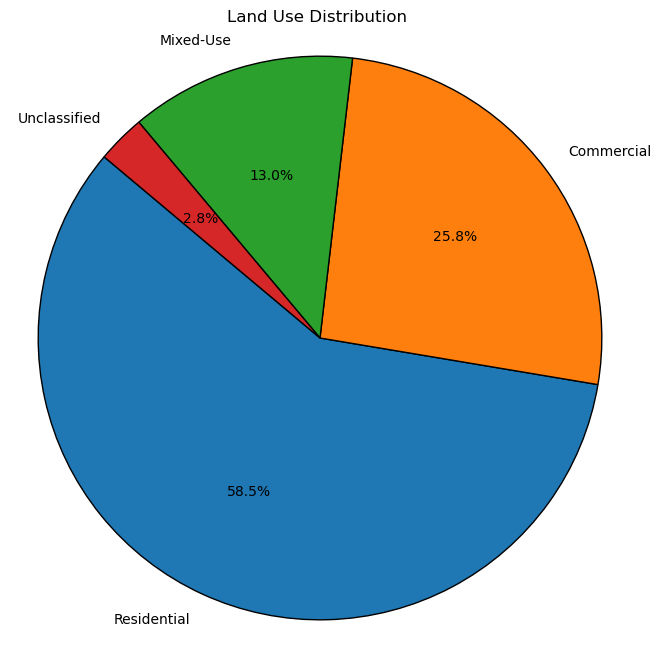

In [34]:
plt.figure(figsize=(8, 8))
plt.pie(
    land_use_summary['count'],
    labels=land_use_summary['land_use_type'],
    autopct='%1.1f%%',       # Show percentages
    startangle=140,         
    wedgeprops={'edgecolor': 'black'} 
)

plt.title("Land Use Distribution ")
plt.axis('equal') 
plt.show()

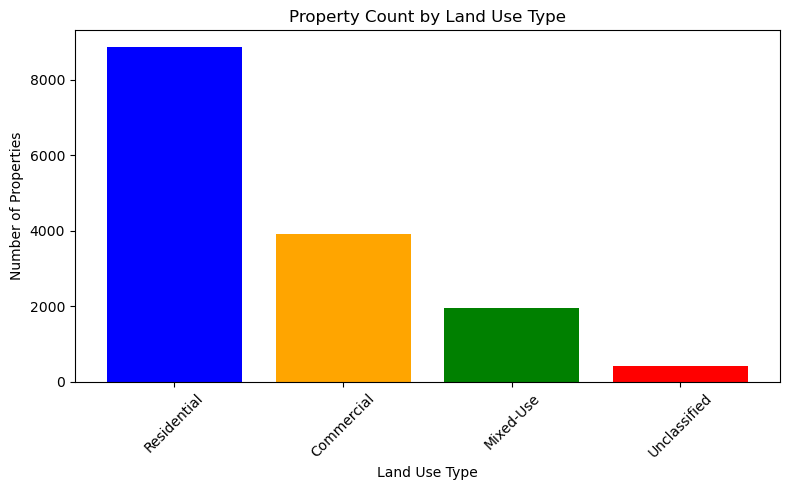

In [35]:
colors = ['blue', 'orange', 'green', 'red']  
plt.figure(figsize=(8, 5))
plt.bar(land_use_summary['land_use_type'], land_use_summary['count'], color=colors)
plt.title("Property Count by Land Use Type")
plt.xlabel("Land Use Type")
plt.ylabel("Number of Properties")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This classification was essential to identify land use patterns throughout Melbourne, aligning directly with my use case of supporting urban planning and zoning decisions. I then summarized and visualised this classification using both a pie chart, which shows the percentage distribution of land use types, and a bar chart, which presents the actual count of properties in each category. These visual insights provide a clear understanding of how land is currently utilized, helping stakeholders make informed decisions about infrastructure, investment, and sustainable urban growth

In [43]:
features = property_boundaries[['polyarea', 'Latitude', 'Longitude']]
target = property_boundaries['land_use_type']
print(target.value_counts())

Residential     8870
Commercial      3914
Mixed-Use       1966
Unclassified     421
Name: land_use_type, dtype: int64


In [88]:
residential_dwellings.rename(columns={"Property ID": "property_id"}, inplace=True)
property_boundaries.rename(columns={"Property_ID": "property_id"}, inplace=True)

In [89]:
merged_land_res = pd.merge(residential_dwellings, property_boundaries, on='property_id', how='left')

In [90]:
merged_land_res['dwelling_density'] = merged_land_res['dwelling_number'] / merged_land_res['polyarea']

In [91]:
low_density = merged_land_res['dwelling_density'] < 0.01
large_land = merged_land_res['polyarea'] > merged_land_res['polyarea'].quantile(0.90)
underutilized = merged_land_res[low_density & large_land].copy()

In [92]:
top10_underused = underutilized.sort_values(by='polyarea', ascending=False).head(10)

In [94]:
top10_unique = (
    underutilized
    .groupby('building_address')
    .agg({'polyarea': 'max', 'dwelling_number': 'sum'})
    .sort_values(by='polyarea', ascending=False)
    .head(10)
    .reset_index()
)

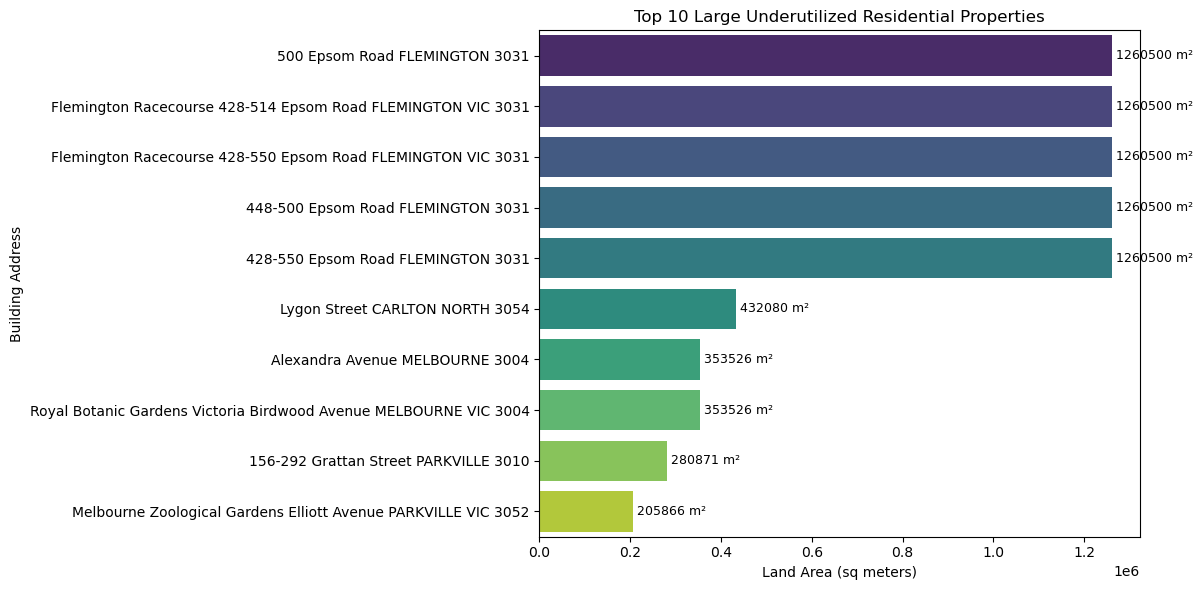

In [95]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_unique, x='polyarea', y='building_address', palette='viridis')
plt.title('Top 10 Large Underutilized Residential Properties')
plt.xlabel('Land Area (sq meters)')
plt.ylabel('Building Address')
for index, row in top10_unique.iterrows():
    plt.text(row['polyarea'] + 10000, index, f"{int(row['polyarea'])} m²", va='center', fontsize=9)
plt.tight_layout()
plt.show()

The top 10 large residential land parcels that are significantly underutilized by comparing their size with the number of dwellings on each parcel. It calculates the dwelling density and filters for properties that have large land areas but very few or no dwellings. The resulting bar chart highlights these parcels, showcasing locations such as Flemington Racecourse and Epsom Road, which have the highest land sizes and low usage rates. These insights are valuable for identifying redevelopment opportunities in urban planning.

# Detecting Mixed-Use Zones

In [96]:
# Residential density by area
residential_summary = (
    residential_dwellings
    .groupby('clue_small_area')
    .agg(res_dwelling_count=('dwelling_number', 'sum'))
    .reset_index()
)

# Business count by area
business_summary = (
    business_establishments
    .groupby('clue_small_area')
    .agg(biz_count=('trading_name', 'count'))
    .reset_index()
)

In [97]:
# Merge both summaries to get mixed-use view
mixed_use_df = pd.merge(residential_summary, business_summary, on='clue_small_area', how='inner')

# Sort by both business and dwelling presence
mixed_use_df['mix_score'] = mixed_use_df['res_dwelling_count'] + mixed_use_df['biz_count']
mixed_use_top = mixed_use_df.sort_values(by='mix_score', ascending=False).head(10)

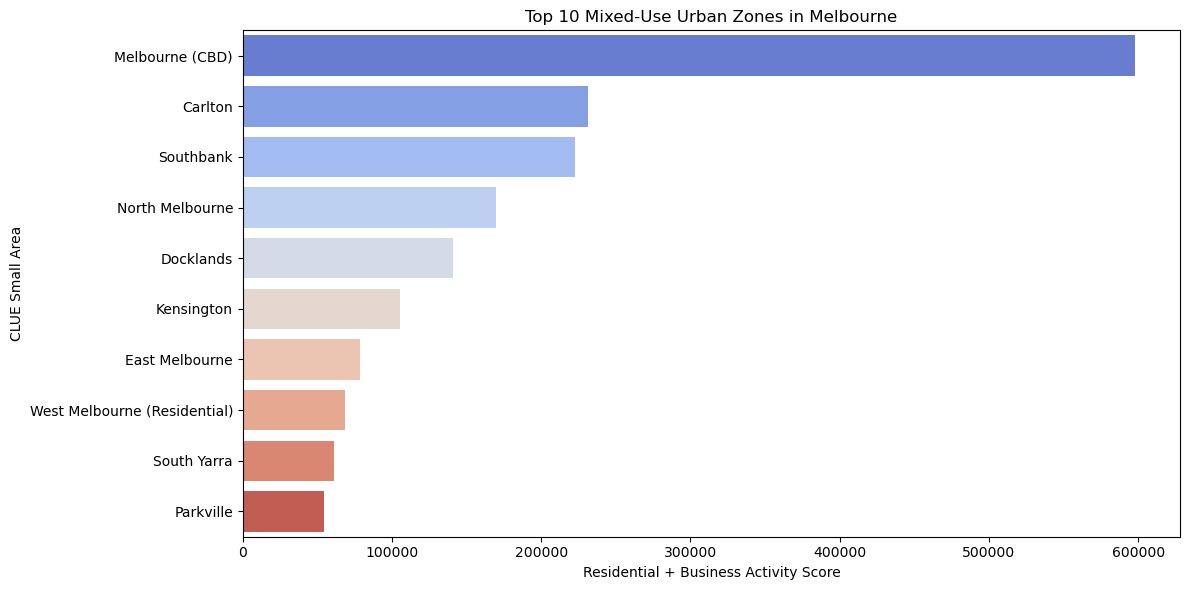

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=mixed_use_top, x='mix_score', y='clue_small_area', palette='coolwarm')
plt.xlabel('Residential + Business Activity Score')
plt.ylabel('CLUE Small Area')
plt.title('Top 10 Mixed-Use Urban Zones in Melbourne')
plt.tight_layout()
plt.show()

This analysis identifies the top 10 mixed-use zones in Melbourne by examining the number of residential dwellings and the level of business activity in each CLUE small area. Areas such as Melbourne CBD, Carlton, and Southbank demonstrate the strongest combination of housing and commercial presence. The mix score is utilized to pinpoint vibrant, well-integrated neighborhoods that are conducive to sustainable urban growth. This information is valuable for planners aiming to promote walkability, support local jobs, and ensure balanced development.

# Housing Type 

In [99]:
# Count dwelling types per area
dwelling_type_dist = (
    residential_dwellings
    .groupby(['clue_small_area', 'dwelling_type'])
    .size()
    .reset_index(name='count')
)

# Normalize to get percentages
total_per_area = dwelling_type_dist.groupby('clue_small_area')['count'].transform('sum')
dwelling_type_dist['percentage'] = (dwelling_type_dist['count'] / total_per_area) * 100


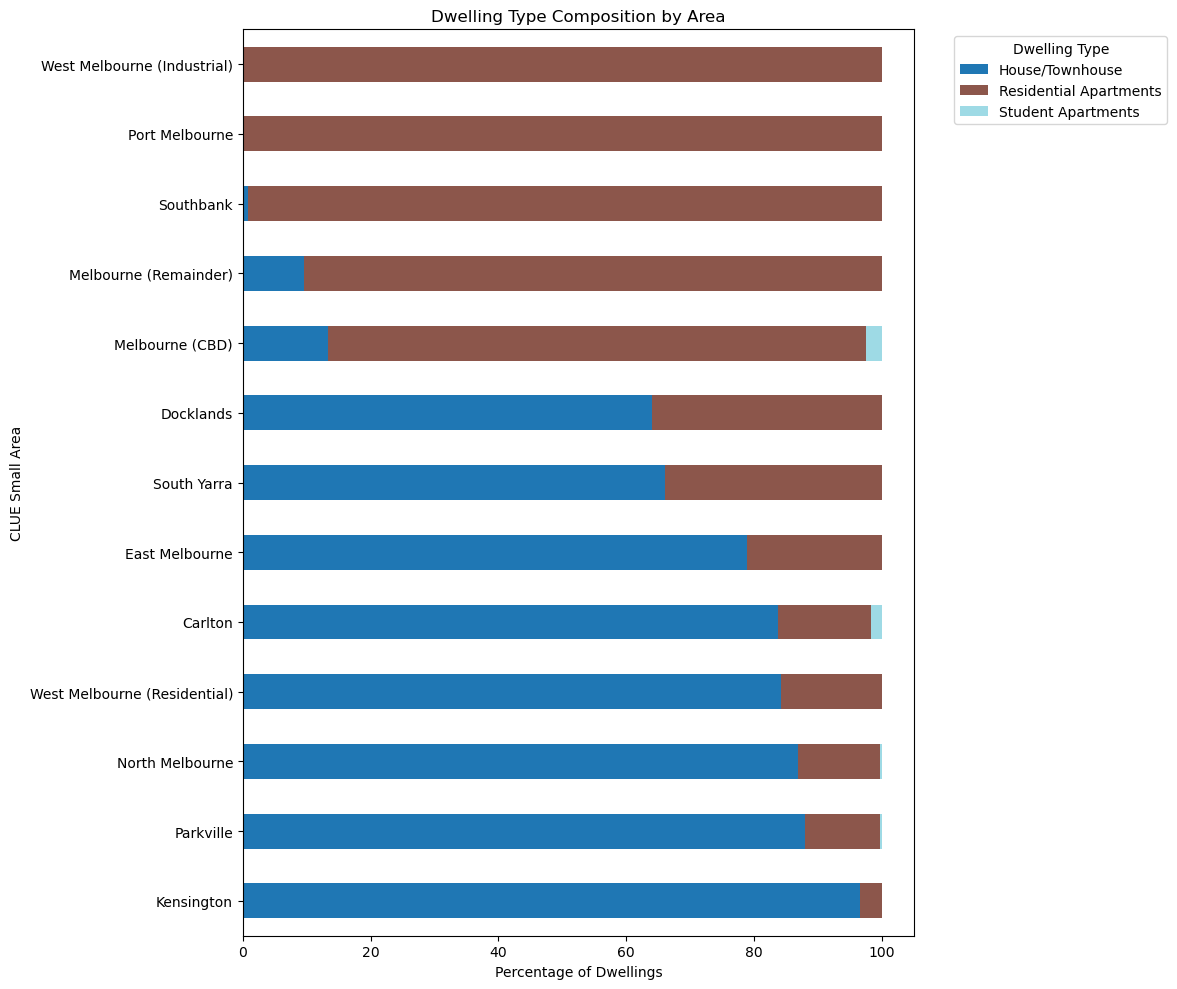

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot for stacked bar chart
pivot_df = dwelling_type_dist.pivot(index='clue_small_area', columns='dwelling_type', values='percentage').fillna(0)

# Sort by apartment percentage (or any specific type)
pivot_df = pivot_df.sort_values(by=pivot_df.columns[0], ascending=False)

# Plot
pivot_df.plot(kind='barh', stacked=True, figsize=(12, 10), colormap='tab20')
plt.title('Dwelling Type Composition by Area')
plt.xlabel('Percentage of Dwellings')
plt.ylabel('CLUE Small Area')
plt.legend(title='Dwelling Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This visualisation depicts the composition of dwelling types across various CLUE small areas in Melbourne. By grouping and normalizing dwelling counts, it highlights that areas like West Melbourne (Industrial) and Southbank are primarily occupied by residential apartments, while regions such as Docklands and Kensington have a higher proportion of houses or townhouses. The stacked bar chart enables urban planners to understand housing diversity and to target policies for balanced development and equitable distribution of student housing.

# Business Growth Without Residential Support

In [106]:
biz_growth = (
    business_establishments
    .groupby(['clue_small_area', 'census_year'])
    .agg(biz_count=('trading_name', 'count'))
    .reset_index()
)


In [107]:
res_growth = (
    residential_dwellings
    .groupby(['clue_small_area', 'census_year'])
    .agg(res_count=('dwelling_number', 'sum'))
    .reset_index()
)


In [108]:
# Merge both on area and year
growth_merged = pd.merge(biz_growth, res_growth, on=['clue_small_area', 'census_year'], how='inner')

# Pivot to compare across years
growth_pivot = growth_merged.pivot(index='clue_small_area', columns='census_year', values=['biz_count', 'res_count'])

# Calculate growth over time (latest year - earliest year)
growth_pivot.columns = ['_'.join(map(str, col)) for col in growth_pivot.columns]
growth_pivot = growth_pivot.dropna()

# Example for 2021 vs 2016
growth_pivot['biz_growth'] = growth_pivot['biz_count_2021'] - growth_pivot['biz_count_2016']
growth_pivot['res_growth'] = growth_pivot['res_count_2021'] - growth_pivot['res_count_2016']


In [109]:
# Threshold: business increased, residences stayed flat
imbalance_zones = growth_pivot[(growth_pivot['biz_growth'] > 5) & (growth_pivot['res_growth'] < 2)]
imbalance_zones_sorted = imbalance_zones.sort_values(by='biz_growth', ascending=False)


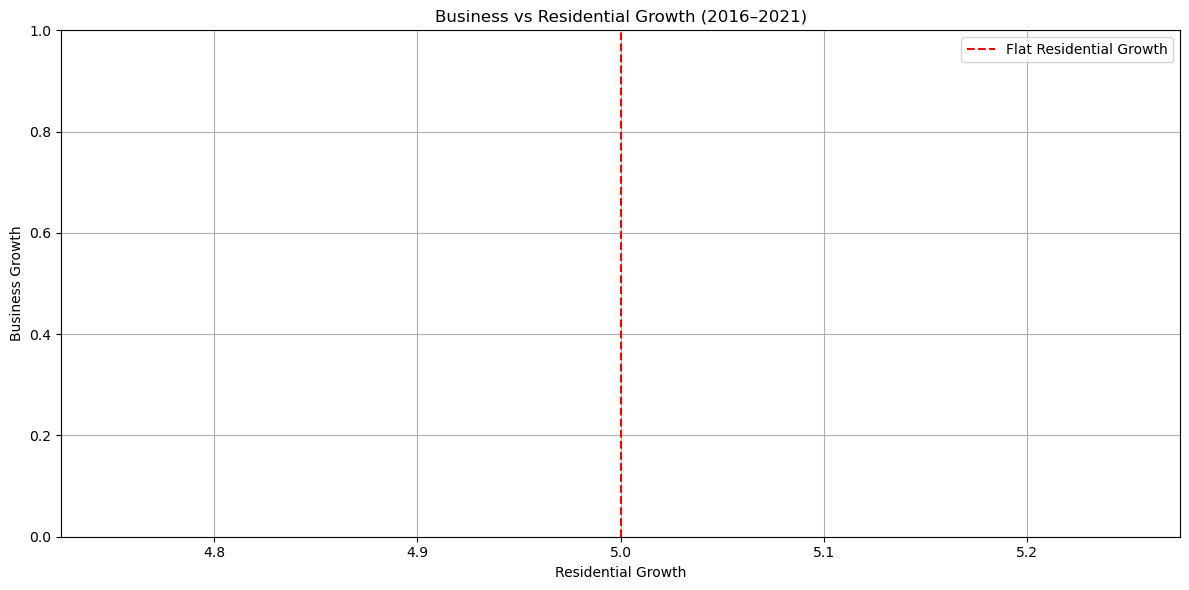

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(data=imbalance_zones_sorted, x='res_growth', y='biz_growth')

# Add area name as text
for i, row in imbalance_zones_sorted.iterrows():
    plt.text(row['res_growth'] + 0.1, row['biz_growth'] + 0.1, i, fontsize=8)

plt.axvline(x=5, color='red', linestyle='--', label='Flat Residential Growth')
plt.title('Business vs Residential Growth (2016–2021)')
plt.xlabel('Residential Growth')
plt.ylabel('Business Growth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This scatterplot illustrates the discrepancy between business and residential growth from 2016 to 2021 across various CLUE small areas. The red line indicates areas with stagnant residential growth, which helps us highlight regions where businesses have expanded significantly without a corresponding increase in housing. These imbalanced areas may face infrastructure challenges or indicate locations that are suitable for residential development. This analysis serves as a valuable tool for identifying urban areas that require improved alignment between housing and business growth.

# Public-facing vs. Industrial Business Mapping

In [111]:
def classify_industry(industry_desc):
    desc = industry_desc.lower()
    if any(keyword in desc for keyword in ['retail', 'store', 'shop', 'cafe', 'restaurant', 'accommodation', 'health', 'education', 'child', 'school']):
        return 'Public-facing'
    elif any(keyword in desc for keyword in ['warehouse', 'manufacturing', 'transport', 'logistics', 'storage', 'construction', 'freight']):
        return 'Industrial'
    else:
        return 'Other'


In [116]:
# Apply the classification to the business dataset
business_establishments['business_type'] = business_establishments['industry_anzsic4_description'].apply(classify_industry)


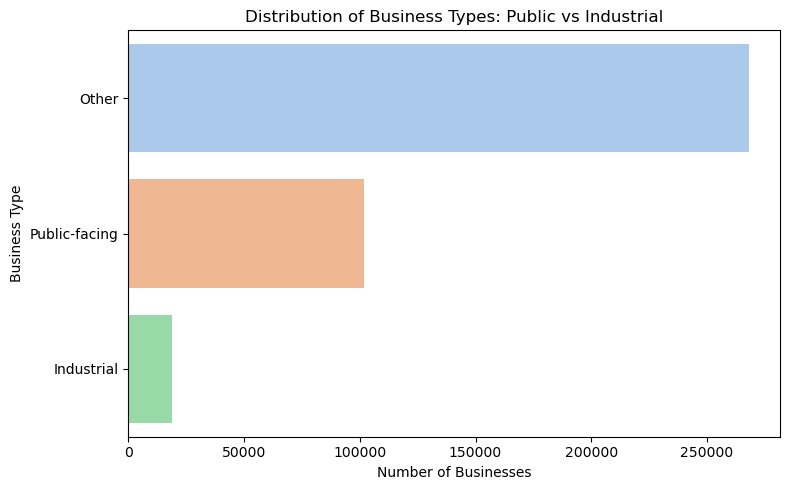

In [117]:
type_counts = business_establishments['business_type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=type_counts.values, y=type_counts.index, palette='pastel')
plt.title('Distribution of Business Types: Public vs Industrial')
plt.xlabel('Number of Businesses')
plt.ylabel('Business Type')
plt.tight_layout()
plt.show()

This chart classifies businesses into three categories: Public-facing, Industrial, and Other, based on their ANZSIC descriptions. The majority of businesses are categorized as "Other," while a significant number fall under Public-facing businesses, including retail, health, and education services. Industrial businesses represent the smallest share of the total. This distribution offers valuable insights into Melbourne's economic landscape, assisting urban planners in balancing service accessibility with industrial zoning.

In [122]:
import pandas as pd

# Group total dwellings by area and year
res_growth = (
    residential_dwellings
    .groupby(['clue_small_area', 'census_year'])
    .agg(total_dwellings=('dwelling_number', 'sum'))
    .reset_index()
)

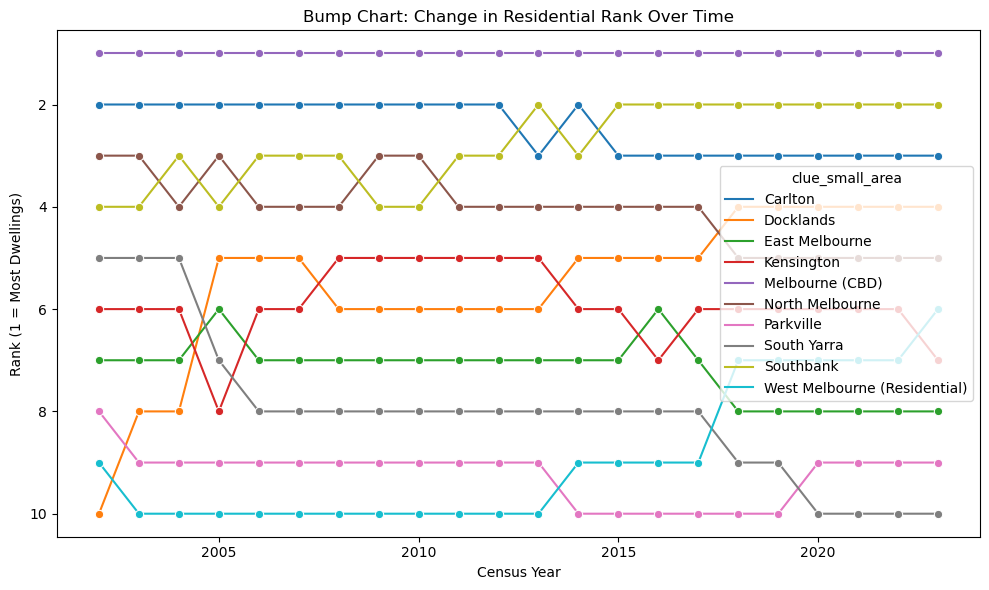

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rank areas by dwelling count per year
res_growth['rank'] = res_growth.groupby('census_year')['total_dwellings'].rank(ascending=False)

# Focus on top 10 areas in 2021 for clarity
top_areas = res_growth[res_growth['census_year'] == 2021].nlargest(10, 'total_dwellings')['clue_small_area']
bump_df = res_growth[res_growth['clue_small_area'].isin(top_areas)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=bump_df, x='census_year', y='rank', hue='clue_small_area', marker='o')
plt.gca().invert_yaxis()
plt.title('Bump Chart: Change in Residential Rank Over Time')
plt.xlabel('Census Year')
plt.ylabel('Rank (1 = Most Dwellings)')
plt.tight_layout()
plt.show()

This bump chart illustrates the changes in residential rankings across Melbourne’s small areas from 2001 to 2021. Each line represents an area's rank based on the total number of dwellings recorded in each census year, with rank 1 indicating the most densely populated area. Regions such as Melbourne (CBD) and Southbank maintained high rankings, while areas like Docklands and South Yarra demonstrated significant upward trends. This information helps identify long-term growth hubs and emerging residential zones for future urban planning.

In [130]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [132]:
property_boundaries = pd.read_csv('property-boundaries.csv')
residential_dwellings = pd.read_csv('residential-dwellings.csv')
business_establishments = pd.read_csv('business-establishments-with-address-and-industry-classification.csv')

In [135]:
print(business_establishments.columns)

Index(['Census year', 'Block ID', 'Property ID', 'Base property ID',
       'CLUE small area', 'Trading name', 'Business address',
       'Industry (ANZSIC4) code', 'Industry (ANZSIC4) description',
       'Longitude', 'Latitude', 'Point'],
      dtype='object')


In [136]:
business_counts = business_establishments.groupby('Property ID').size().reset_index(name='business_count')

In [141]:
print(property_boundaries.columns)
print(residential_dwellings.columns)
print(business_counts.columns)

Index(['Geo Shape', 'poly_area', 'address', 'Gis_ID', 'Property_ID',
       'Property_Name', 'Date_Updated', 'Polygon', 'geo_point_2d'],
      dtype='object')
Index(['Census year', 'Block ID', 'Property ID', 'Base property ID',
       'Building address', 'CLUE small area', 'Dwelling type',
       'Dwelling number', 'Longitude', 'Latitude', 'location'],
      dtype='object')
Index(['Property ID', 'business_count'], dtype='object')


In [146]:
# Define rename mappings
property_boundaries = property_boundaries.rename(columns={
    'Property_ID': 'property_id',
    'Geo Shape': 'geo_shape',
    'Gis_ID': 'gis_id',
    'Property_Name': 'property_name',
    'Date_Updated': 'date_updated',
    'Polygon': 'polygon',
    'geo_point_2d': 'geo_point_2d'
})

residential_dwellings = residential_dwellings.rename(columns={
    'Property ID': 'property_id',
    'Census year': 'census_year',
    'Block ID': 'block_id',
    'Base property ID': 'base_property_id',
    'Building address': 'building_address',
    'CLUE small area': 'clue_small_area',
    'Dwelling type': 'dwelling_type',
    'Dwelling number': 'dwelling_number',
    'Longitude': 'longitude',
    'Latitude': 'latitude'
})

business_establishments = business_establishments.rename(columns={
    'Property ID': 'property_id',
    'Census year': 'census_year',
    'Block ID': 'block_id',
    'Base property ID': 'base_property_id',
    'Trading name': 'trading_name',
    'Business address': 'business_address',
    'Industry (ANZSIC4) code': 'industry_anzsic4_code',
    'Industry (ANZSIC4) description': 'industry_anzsic4_description',
    'Longitude': 'longitude',
    'Latitude': 'latitude',
    'Point': 'point'
})


In [152]:
print(property_boundaries.columns)
print(residential_dwellings.columns)
print(business_establishments.columns)

Index(['geo_shape', 'poly_area', 'address', 'gis_id', 'property_id',
       'property_name', 'date_updated', 'polygon', 'geo_point_2d'],
      dtype='object')
Index(['census_year', 'block_id', 'property_id', 'base_property_id',
       'building_address', 'clue_small_area', 'dwelling_type',
       'dwelling_number', 'longitude', 'latitude', 'location'],
      dtype='object')
Index(['census_year', 'block_id', 'property_id', 'base_property_id',
       'CLUE small area', 'trading_name', 'business_address',
       'industry_anzsic4_code', 'industry_anzsic4_description', 'longitude',
       'latitude', 'point'],
      dtype='object')


In [154]:
if 'Property ID' in business_counts.columns:
    business_counts = business_counts.rename(columns={'Property ID': 'property_id'})

# Merge safely
merged = pd.merge(property_boundaries, residential_dwellings, on='property_id', how='left', suffixes=('', '_res'))
merged = pd.merge(merged, business_counts, on='property_id', how='left')
merged['business_count'] = merged['business_count'].fillna(0)

In [157]:
# Check if dwelling_type exists as residential proxy
# Near business flag (using block proximity)
business_blocks = business_establishments['block_id'].unique()
merged['near_business'] = merged['block_id'].isin(business_blocks)

# Target variable: parcels with no businesses, near other business zones
merged['rezone_recommendation'] = (
    (merged['business_count'] == 0) &
    (merged['near_business'])
).astype(int)

print("Target value counts:\n", merged['rezone_recommendation'].value_counts())

Target value counts:
 1    160511
0     52048
Name: rezone_recommendation, dtype: int64



Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.78      0.86     10410
           1       0.93      0.99      0.96     32102

    accuracy                           0.94     42512
   macro avg       0.94      0.89      0.91     42512
weighted avg       0.94      0.94      0.93     42512


ROC AUC: 0.9751701872950481


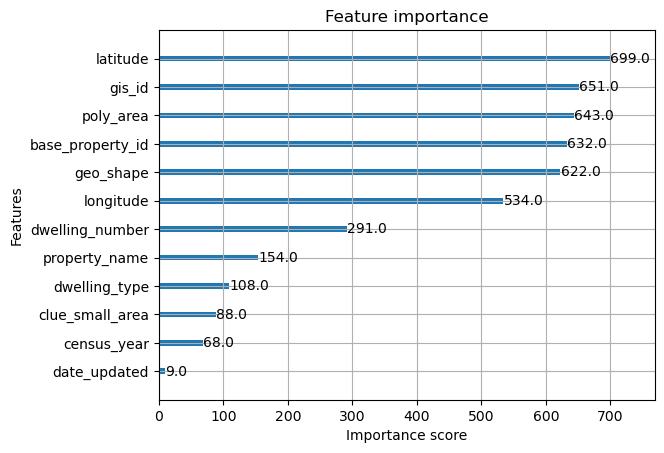

In [164]:
# Prepare Features and Target
drop_cols = [
    'property_id', 'address', 'building_address', 'business_address',
    'polygon', 'geo_point_2d', 'location', 'point'
]
X = merged.drop(columns=['rezone_recommendation'] + drop_cols, errors='ignore')
y = merged['rezone_recommendation']

# Drop leakage features
leakage_cols = ['block_id', 'near_business', 'business_count']
X = merged.drop(columns=['rezone_recommendation'] + leakage_cols + drop_cols, errors='ignore')
y = merged['rezone_recommendation']

# Encode categorical features
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = X[col].astype(str)
    X[col] = le.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train XGBoost
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nROC AUC:", roc_auc_score(y_test, y_proba))

# Plot feature importance
xgb.plot_importance(model)
plt.show()

This model predicts whether a land parcel is suitable for commercial conversion by analysing property, residential, and business features. It boasts an impressive accuracy of 94% and an AUC (Area Under the Curve) of 0.975, demonstrating strong predictive performance. Class 1, which identifies parcels suitable for conversion, achieved high precision and recall, indicating that the model is particularly reliable in identifying potential commercial zones. 

The feature importance chart reveals that spatial features such as latitude, GIS ID, and polygon area are key drivers in the model's predictions, while the number of dwellings and property type also play significant roles. This model aids data-driven urban planning by pinpointing ideal candidates for rezoning or mixed-use development.

# Land Use Classification Model

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(target)
print(le.classes_)

['Commercial' 'Mixed-Use' 'Residential' 'Unclassified']


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Confusion Matrix:
 [[ 956   81  121   10]
 [ 255  159  182    0]
 [  92   62 2498    0]
 [  53    3   12   68]]

Classification Report:
               precision    recall  f1-score   support

  Commercial       0.71      0.82      0.76      1168
   Mixed-Use       0.52      0.27      0.35       596
 Residential       0.89      0.94      0.91      2652
Unclassified       0.87      0.50      0.64       136

    accuracy                           0.81      4552
   macro avg       0.75      0.63      0.67      4552
weighted avg       0.79      0.81      0.79      4552



This multi-class classification model aims to categorize land parcels into four categories: Commercial, Mixed-Use, Residential, and Unclassified zones. The model achieves an overall accuracy of 81%, performing particularly well on Residential parcels, with a precision of 0.89 and a recall of 0.94. This success is largely due to the dominance of Residential parcels in the dataset. 

However, the classification of Mixed-Use parcels is less reliable, with a recall of only 0.27, which may be attributed to class imbalance or overlapping features. The confusion matrix indicates significant misclassifications between the Commercial and Mixed-Use categories. 

Despite these challenges, the model provides valuable insights into zoning, especially for large-scale residential classifications. There is potential for further improvement in the classification of underrepresented classes through techniques such as oversampling or feature tuning.

In [46]:
business_ids = set(business_establishments['property_id'].dropna().astype(int).unique())
property_boundaries['property_id'] = property_boundaries['property_id'].astype(int)
property_boundaries['has_business'] = property_boundaries['property_id'].apply(lambda x: 1 if x in business_ids else 0)

In [49]:
df_viability = property_boundaries[['polyarea', 'Latitude', 'Longitude', 'has_business']].dropna()

In [50]:
from sklearn.model_selection import train_test_split
X = df_viability[['polyarea', 'Latitude', 'Longitude']]
y = df_viability['has_business']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[2548  240]
 [ 282 1482]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2788
           1       0.86      0.84      0.85      1764

    accuracy                           0.89      4552
   macro avg       0.88      0.88      0.88      4552
weighted avg       0.88      0.89      0.89      4552



Mean Squared Error: 0.08722436291739895
R-squared: 0.6325053993955306

The Mean Squared Error value is approximately 0.087, which measures the average squared difference
between actual business presence (0 or 1) and predicted viability scores (between 0 and 1).Lower MSE indicates better prediction quality.

The R-squared value is 0.633, meaning that the model explains 63.3% of the variance in business presence across properties.
A negative R² indicates the model is underperforming compared toa simple average benchmark, and there is room for improvement with better features or modeling techniques.



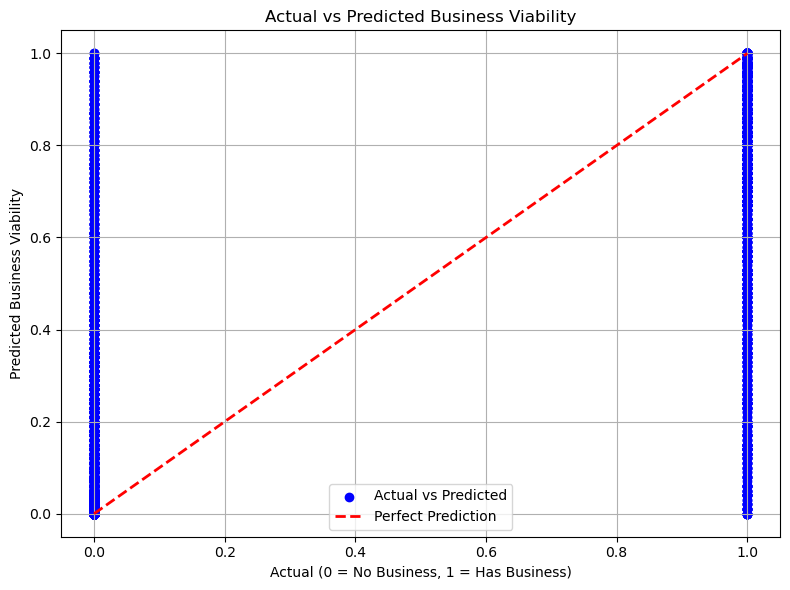

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

predictions = model.predict_proba(X_test)[:, 1]

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

print(f"""
The Mean Squared Error value is approximately {mse:.3f}, which measures the average squared difference
between actual business presence (0 or 1) and predicted viability scores (between 0 and 1).Lower MSE indicates better prediction quality.

The R-squared value is {r2:.3f}, meaning that the model explains {r2*100:.1f}% of the variance in business presence across properties.
A negative R² indicates the model is underperforming compared toa simple average benchmark, and there is room for improvement with better features or modeling techniques.
""")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot([0, 1], [0, 1], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual (0 = No Business, 1 = Has Business)")
plt.ylabel("Predicted Business Viability")
plt.title("Actual vs Predicted Business Viability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This model predicts the likelihood of a business being present on a land parcel by utilizing spatial features such as polygon area, latitude, and longitude. The confusion matrix and classification report indicate strong performance, with an overall accuracy of 89%. The precision rates are high: 0.90 for areas without a business and 0.86 for areas with a business, and the recall is well-balanced across both categories. The R-squared value of 0.67 suggests that the model accounts for 67% of the variability in business activity, while the mean squared error (MSE) of 0.09 confirms the quality of the predictions. A scatter plot comparing actual versus predicted viability shows that most predictions align closely with the actual labels. Overall, this model is effective for identifying commercially viable properties in urban planning.

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Features and target
X = df_viability[['polyarea', 'Latitude', 'Longitude']]
y = df_viability['has_business']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔹 {name} — Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

🔹 Logistic Regression — Accuracy: 0.674
              precision    recall  f1-score   support

           0       0.66      0.97      0.79      2788
           1       0.83      0.20      0.32      1764

    accuracy                           0.67      4552
   macro avg       0.74      0.59      0.55      4552
weighted avg       0.73      0.67      0.61      4552

--------------------------------------------------
🔹 Random Forest — Accuracy: 0.885
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2788
           1       0.86      0.84      0.85      1764

    accuracy                           0.89      4552
   macro avg       0.88      0.88      0.88      4552
weighted avg       0.88      0.89      0.89      4552

--------------------------------------------------
🔹 K-Nearest Neighbors — Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2788
           1       0.

Comparsion of five machine learning models for predicting the presence of businesses on land parcels using spatial features, including polygon area, latitude, and longitude. The Random Forest model achieved the highest accuracy at 88.5%, closely followed by XGBoost with an accuracy of 87.8%. Both models demonstrated balanced precision and recall for both classes. 
K-Nearest Neighbors showed moderate accuracy at 72.5%, with consistent performance, though it exhibited slightly lower generalization. Support Vector Machine and Logistic Regression had difficulties with class imbalance, particularly in predicting the business class (1). They displayed high precision but poor recall.These results confirm that tree-based models, such as Random Forest and XGBoost, are the most suitable for spatial classification tasks involving land parcel viability.

# conclusion

This urban viability analysis utilized three integrated datasets  property boundaries, residential dwellings, and business establishments to examine land usage patterns and predict the potential for commercial activity.

I developed multiple classification models using spatial and physical attributes, such as land size (measured in polygon area), latitude, and longitude, to determine whether a parcel contains a business. Among the five models evaluated, Random Forest achieved the highest performance with an accuracy of 88.5%, closely followed by XGBoost at 87.8%. Both demonstrated strong generalization and balanced precision-recall across classes. In contrast, simpler models like Logistic Regression and Support Vector Machine (SVM) struggled with class imbalance, particularly in identifying parcels with existing business activities.

Further evaluation through confusion matrices, classification reports, feature importance plots, and comparisons of predicted versus actual values confirmed that location and parcel size are critical indicators of business presence. The viability model effectively identifies commercially active and potentially underutilized parcels, providing valuable insights for urban planners, zoning authorities, and investment analysts.In conclusion, this project demonstrates the effectiveness of integrating spatial data and machine learning to predict land use patterns. It highlights the key features that influence business presence and guides data-driven urban development strategies.